In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# There is actually not that much data available :( 
# But that also means that training should not take much time with most algos :)
data.shape

(891, 12)

In [5]:
# Checking which columns have NULL values and how many
# Only three columns: Age, Cabin and Embarked have NULL values
# Embarked has only two Null values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

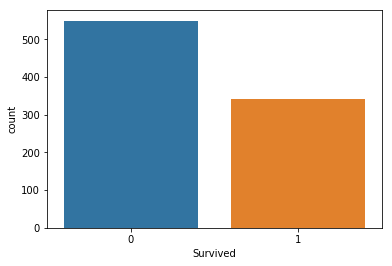

In [6]:
# Number of passengers that survived vs not to get a basic feel
# It can be seen that not that many survived
ax = sb.countplot(x="Survived", data=data)

In [7]:
# Survival rate overall is 38.4%

<h1>Analyzing Individual variables</h1>

  <h2>Sex</h2>

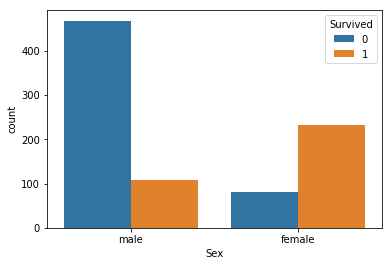

In [8]:
ax = sb.countplot('Sex',hue='Survived',data=data)

In [9]:
# From the above graph it can be seen that:
# 1. The number of men far exceeds the number of women
# 2. The survival rate of women is much higher than that of men and in fact a 
#    lot more women survived compared to the men even though they were lesser in number
# This could indicate that the rescue process might have given priority to women

In [10]:
female_survived = data[(data['Sex'] == 'female') & (data['Survived']==1)].shape[0]
female_dead = data[(data['Sex'] == 'female') & (data['Survived']==0)].shape[0]
male_survived = data[(data['Sex'] == 'male') & (data['Survived']==1)].shape[0]
male_dead = data[(data['Sex'] == 'male') & (data['Survived']==0)].shape[0]

In [11]:
# Percentage of women onboard
(female_dead+female_survived)/(female_dead+female_survived+male_dead+male_survived)*100

35.24130190796858

In [12]:
# Percentage of women survived out of total women
(female_survived)/(female_dead+female_survived)*100

74.20382165605095

In [13]:
# Percetage of men who survived out of total men
(male_survived)/(male_dead+male_survived)*100

18.890814558058924

<h2>Pclass</h2>

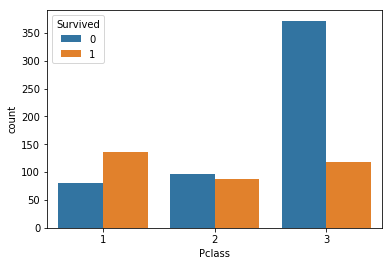

In [14]:
ax = sb.countplot('Pclass',hue='Survived',data=data)

In [15]:
# From the above graph its clear that:
# 1. The number of passengers in Pclass 3 is the highest
# 2. Th percentage of the number of passengers who dies is highest in pClass 3
# 3. The percentage of the number of survivors excees the number of deaths only in pClass 1
# This could indicate that higher the pClass higher the chances of survival

/Users/Shaan/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/Shaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


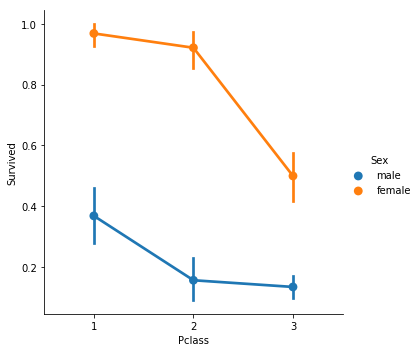

In [16]:
ax = sb.factorplot('Pclass','Survived',hue='Sex',data=data)

In [17]:
# From the above it is confirmed that the women were given priority in rescue throughout
# the class of passengers

<h2>Age</h2>

In [18]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

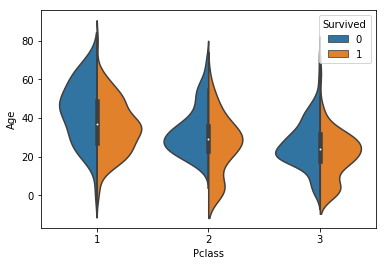

In [19]:
sb.violinplot("Pclass","Age", hue="Survived", data=data,split=True,)

In [20]:
# 1. Children across all Pclasses seem to have better survival chances
# 2. Somwhere around the age of 20 seems to be the maximum amount of people who survived across Pclass

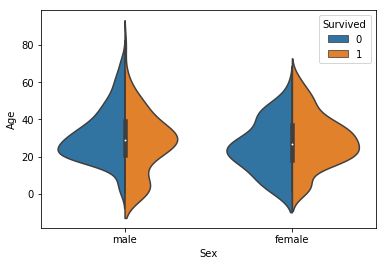

In [21]:
sb.violinplot("Sex","Age", hue="Survived", data=data,split=True)

In [22]:
# 3. Again survival chances of women better across all ages
# 4. There seems to be a 'women and child safety first' policy followed of some sorts

In [23]:
# Age has a lot of NaN values. These will be filled based on the title used in the name
# This will be further elaborated upon the Feature Engineering section

<h2>Embarked</h2>

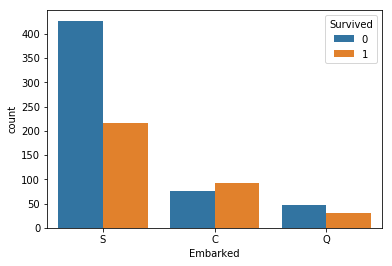

In [24]:
sb.countplot('Embarked',hue='Survived',data=data)

In [25]:
# S seems to have the greated value compared to the others, Q seems miniscule
# C is the only one with a marginally better rate of survival compared to the others

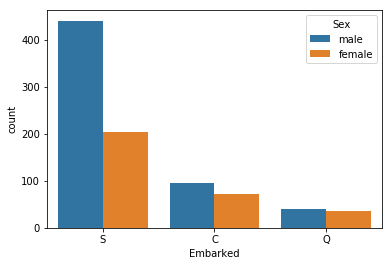

In [26]:
sb.countplot('Embarked',hue='Sex',data=data)

In [27]:
# As usual it is seen above that the number of males far exceeds that of females especially in S
# There are about the same people from both the sexes in Q alone (but thats a small number)

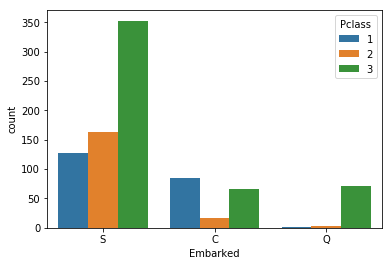

In [28]:
sb.countplot('Embarked',hue='Pclass',data=data)

In [29]:
# As can be seen most people in S and Q are from Pclass 3. Only C has a slightly higher number of 
# passengers from Pclass 1 and it also had slightly higher number of survivors. This further indicated that
# higher the class meant greater chances of rescue

In [30]:
# There are two null values in Embarked as was seen earlier

<h2>SibSp</h2>

In [31]:
# This feature indicated number of siblings and spouses the person has along onboard

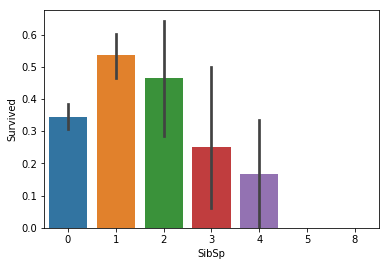

In [32]:
sb.barplot('SibSp','Survived',data=data)

In [33]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap='Wistia')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [34]:
# As can be seen that having 1-2 siblings means mean higher rate of survival following which chances of survival
# decrease

<h2>Parch</h2>

In [35]:
# This indicates the number of Parents onboard

/Users/Shaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


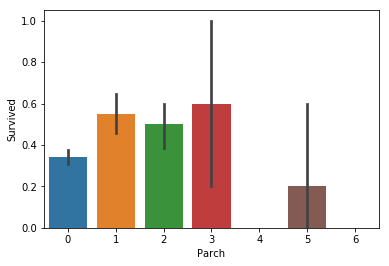

In [36]:
sb.barplot('Parch','Survived',data=data)

In [37]:
pd.crosstab(data.Parch, data.Survived).style.background_gradient(cmap='Wistia')

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [38]:
# Again having 1-3 parents onboard allows a higher rate of survival. Having more parents reduces survival rate
# From both SubSp and Parch it is clear that being alone or having too man family members onboard, both extremeties,
# have fatal outcomes

<h2>Fare</h2>

In [39]:
# This is a continuous variable but should lend itself to binning as there should be standardised fares

In [40]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [43]:
# Woah somebody had a free trip! Or can these people be staff?

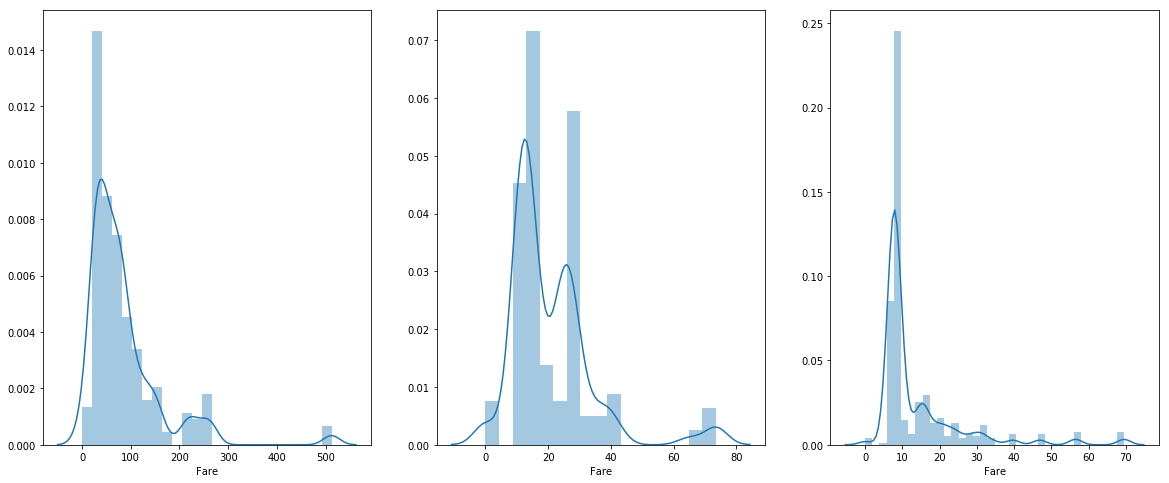

In [58]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sb.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
sb.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
sb.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
plt.show()

<h2>HeatMap</h2>

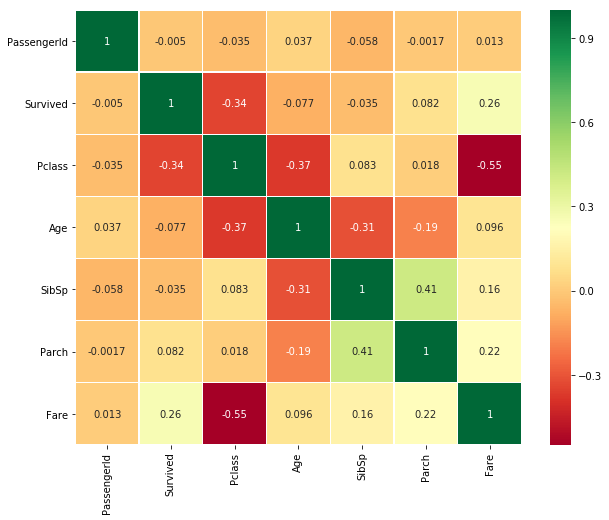

In [59]:
sb.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()